In [1]:
import numpy as np
import os
import sys
import cv2 
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd
import glob

import seaborn as sns
import tensorflow as tf
from tensorflow.keras import  Model,Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ayush\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ayush\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Ayush\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
print(os.listdir("E:/CNN"))

SIZE = 128

train_images = []
train_labels = [] 
for directory_path in glob.glob("E:/CNN/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

['test', 'train']
Acalypha indica L
E:/CNN/train\Acalypha indica L\AI-001.jpg
E:/CNN/train\Acalypha indica L\AI-002.jpg
E:/CNN/train\Acalypha indica L\AI-003.jpg
E:/CNN/train\Acalypha indica L\AI-004.jpg
E:/CNN/train\Acalypha indica L\AI-005.jpg
E:/CNN/train\Acalypha indica L\AI-006.jpg
E:/CNN/train\Acalypha indica L\AI-007.jpg
E:/CNN/train\Acalypha indica L\AI-008.jpg
E:/CNN/train\Acalypha indica L\AI-009.jpg
E:/CNN/train\Acalypha indica L\AI-010.jpg
E:/CNN/train\Acalypha indica L\AI-011.jpg
E:/CNN/train\Acalypha indica L\AI-012.jpg
E:/CNN/train\Acalypha indica L\AI-013.jpg
E:/CNN/train\Acalypha indica L\AI-014.jpg
E:/CNN/train\Acalypha indica L\AI-015.jpg
E:/CNN/train\Acalypha indica L\AI-016.jpg
E:/CNN/train\Acalypha indica L\AI-017.jpg
E:/CNN/train\Acalypha indica L\AI-018.jpg
E:/CNN/train\Acalypha indica L\AI-019.jpg
E:/CNN/train\Acalypha indica L\AI-020.jpg
E:/CNN/train\Acalypha indica L\AI-021.jpg
E:/CNN/train\Acalypha indica L\AI-022.jpg
E:/CNN/train\Acalypha indica L\AI-023.jp

In [3]:
train_images.shape

(1457, 128, 128, 3)

In [4]:
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("E:/CNN/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [5]:
print(test_labels.shape)
print(train_labels.shape)
print(test_images[0].shape)
print(test_images[0].shape)
SIZE = 128

(425,)
(1457,)
(128, 128, 3)
(128, 128, 3)


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [7]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape
x_test.shape

(425, 128, 128, 3)

In [9]:
x_train.shape

(1457, 128, 128, 3)

In [12]:
# def rgb2gray(rgb):
#     r, g, b = rgb[0], rgb[1], rgb[2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
#     return gray

# X_train_gray = test_image.copy()

# for i in range (X_train_gray.shape[0]):
#     for j in range (X_train_gray.shape[1]):
#         for k in range (X_train_gray.shape[2]):
#             rgb = X_train_gray[i,j,k]
#             gray = rgb2gray(rgb)
#             X_train_gray[i,j,k] = gray

# print("X_train image data shape =",test_image.shape)
# print("X_train_grey image data shape =", X_train_gray.shape)

In [10]:
from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [11]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [12]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(32, activation = 'softmax')(x)
x.shape

TensorShape([None, 128])

In [17]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

In [43]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot))

Epoch 1/50
46/46 [==============================] - 105s 2s/step - loss: 3.3540 - accuracy: 0.0975 - val_loss: 3.4667 - val_accuracy: 0.0612
Epoch 2/50
46/46 [==============================] - 96s 2s/step - loss: 2.9003 - accuracy: 0.2032 - val_loss: 3.6112 - val_accuracy: 0.0518
Epoch 3/50
46/46 [==============================] - 100s 2s/step - loss: 2.5508 - accuracy: 0.2759 - val_loss: 3.7107 - val_accuracy: 0.0424
Epoch 4/50
46/46 [==============================] - 91s 2s/step - loss: 2.2858 - accuracy: 0.3191 - val_loss: 4.2534 - val_accuracy: 0.0800
Epoch 5/50
46/46 [==============================] - 89s 2s/step - loss: 2.0103 - accuracy: 0.4365 - val_loss: 4.2025 - val_accuracy: 0.0471
Epoch 6/50
46/46 [==============================] - 89s 2s/step - loss: 1.7449 - accuracy: 0.5168 - val_loss: 4.2479 - val_accuracy: 0.0518
Epoch 7/50
46/46 [==============================] - 90s 2s/step - loss: 1.5806 - accuracy: 0.5607 - val_loss: 5.1404 - val_accuracy: 0.0353
Epoch 8/50
46/46 [

In [44]:
cnn_model.save('leaf.model')

INFO:tensorflow:Assets written to: leaf.model\assets


In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
cnn_model = load_model('leaf.model')

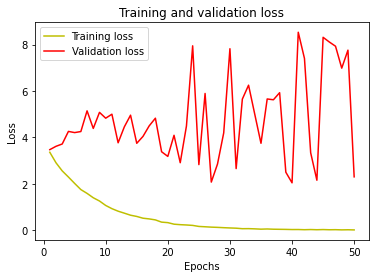

In [45]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

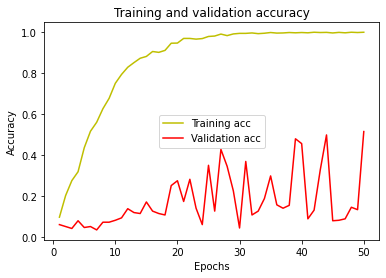

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
from tensorflow.keras.models import load_model
cnn_model=load_model('leaf.model')

In [22]:
x_test.shape

(425, 128, 128, 3)

In [39]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
# prediction_NN = le.inverse_transform(prediction_NN)

In [44]:
prediction_NN

array([ 0, 31, 31,  0, 31,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  2,  2,  3,  2,  2,  3, 22,  2, 13,  5,  3,  3,
        3,  3,  9,  9,  3,  9,  3,  3,  3,  3,  3,  3,  9,  3,  3,  3,  3,
        3,  3,  3,  3, 31,  5,  4,  3,  5, 30,  5,  5,  3,  9, 21,  5,  5,
        3,  8,  6,  6,  6,  6,  6, 30,  3, 30,  6, 30, 30,  6, 21,  5,  6,
        6,  6,  6, 21,  6, 19, 31, 31,  3,  3,  3,  9, 31, 31, 31,  5,  3,
        8,  8,  8,  8,  8,  8,  8,  5,  8,  8,  8,  5,  8,  8,  9,  3,  8,
        3,  8,  3,  9,  9,  3,  3,  9,  3, 10,  8,  9,  8, 10,  5,  5,  5,
       10, 11, 11, 11,  5, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  3, 13,  3,
       13,  3, 13, 13,  3,  3, 13, 13, 30, 14, 14, 21, 21, 17,  5, 21, 21,
       17, 21, 14,  5, 14, 30, 29, 17, 17, 21, 30, 15, 30, 15, 15, 15, 15,
        3, 15, 15,  3, 15, 15, 15,  3, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       16,  1, 16, 16, 16

In [45]:
acc = history.history['accuracy']
from statistics import mean
mean(acc)

NameError: name 'history' is not defined

In [46]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion matrix")
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
# sns.heatmap(cm, annot=True)


Confusion matrix


ValueError: Mix of label input types (string and number)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, prediction_NN))

ValueError: Mix of label input types (string and number)

The prediction for this image is:  ['Aegle marmelos Corr.ex.Roxb']
The actual label for this image is:  Aegle marmelos Corr.ex.Roxb


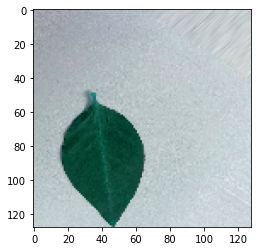

In [33]:
n=32
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

# ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_labels_encoded, prediction_NN)

In [ ]:
print('AUC: {}'.format(auc(fpr, tpr)))
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(test_labels)
# test_labels_encoded = le.transform(test_labels)
# le.fit(train_labels)
# train_labels_encoded = le.transform(train_labels)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

# Pre-processing the image
img = image.load_img("D:/Dataset ITWWS/WT-001.jpg", target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor=img = cv2.resize(img_tensor, (128,128))
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

# Print image tensor shape
print(img_tensor.shape)

# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()


In [ ]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
from keras import models
from keras import layers
layer_outputs = [layer.output for layer in cnn_model.layers[:8]]
activation_model = models.Model(inputs = cnn_model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Getting Activations of first layer
first_layer_activation = activations[0]

# shape of first layer activation
print(first_layer_activation.shape)

# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')

# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')


In [ ]:

layer_names = []
  
for layer in cnn_model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)